In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
# Load Metrics from CSV Files
model_files = {
    'Vasicek_1F': 'vasicek_one_factor_metrics.csv',
    'Vasicek_2F': 'vasicek_two_factor_metrics.csv',
    'CIR_1F': 'cir_one_factor_metrics.csv',
    'CIR_2F': 'cir_two_factor_metrics.csv',
    'Hull-White_1F': 'hull_white_one_factor_metrics.csv',
    'Hull-White_2F': 'hull_white_two_factor_metrics.csv',
    'BGM': 'bgm_metrics.csv'
}

# Load and combine metrics without renaming columns
df_metrics = pd.DataFrame()
for model, file in model_files.items():
    df_temp = pd.read_csv(file)
    df_temp.index = [model]
    df_metrics = pd.concat([df_metrics, df_temp])

df_metrics.index.name = 'Model'
print("Combined Model Metrics:")
print(df_metrics)

Combined Model Metrics:
               R-squared      RMSE         AIC
Model                                         
Vasicek_1F      0.762985  0.158323 -161.566861
Vasicek_2F      0.929826  0.086148 -209.555659
CIR_1F          0.760003  0.159316 -160.991817
CIR_2F          0.787035  0.150075 -158.488746
Hull-White_1F   0.758395  0.159848 -162.684667
Hull-White_2F   0.758397  0.159848 -154.685058
BGM             0.756455  0.094380 -204.438113


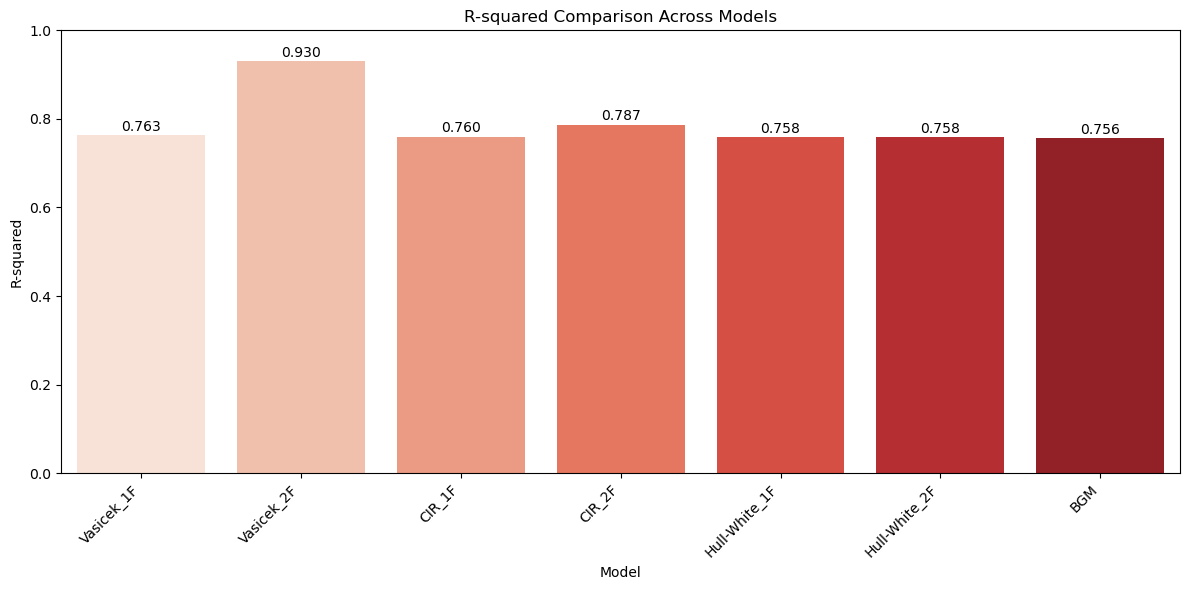

In [91]:
# Bar Plot for R-squared
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R-squared', hue='Model', data=df_metrics, palette='Reds', legend=False)
plt.title('R-squared Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
for i, v in enumerate(df_metrics['R-squared']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

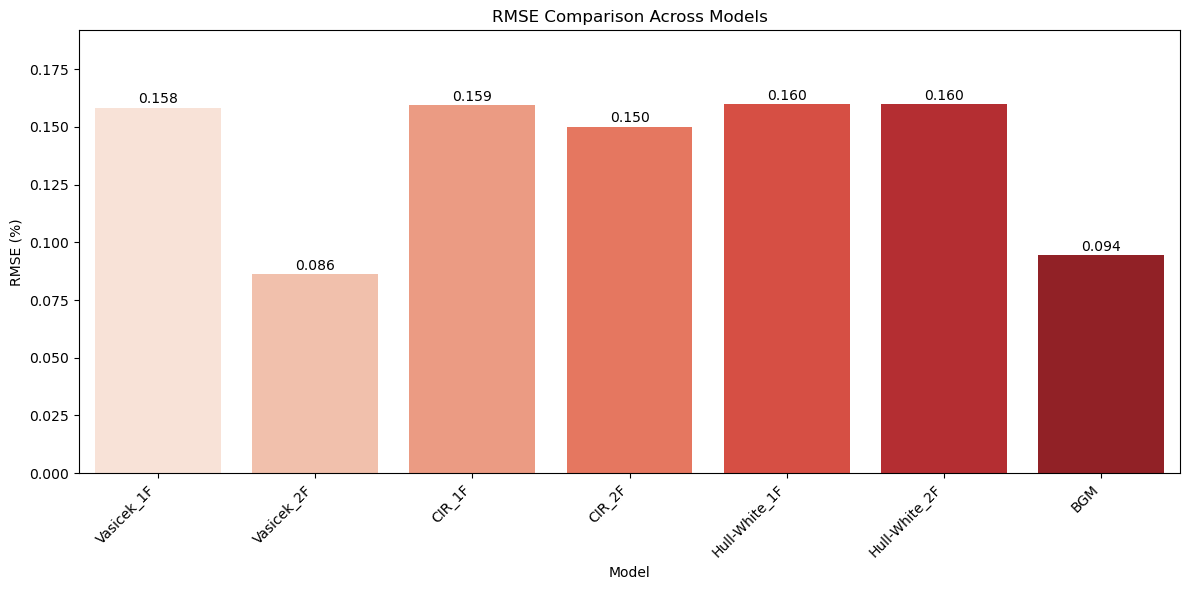

In [92]:
# Bar Plot for RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', hue='Model', data=df_metrics, palette='Reds', legend=False)
plt.title('RMSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(df_metrics['RMSE']) * 1.2)
for i, v in enumerate(df_metrics['RMSE']):
    plt.text(i, v + 0.002, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

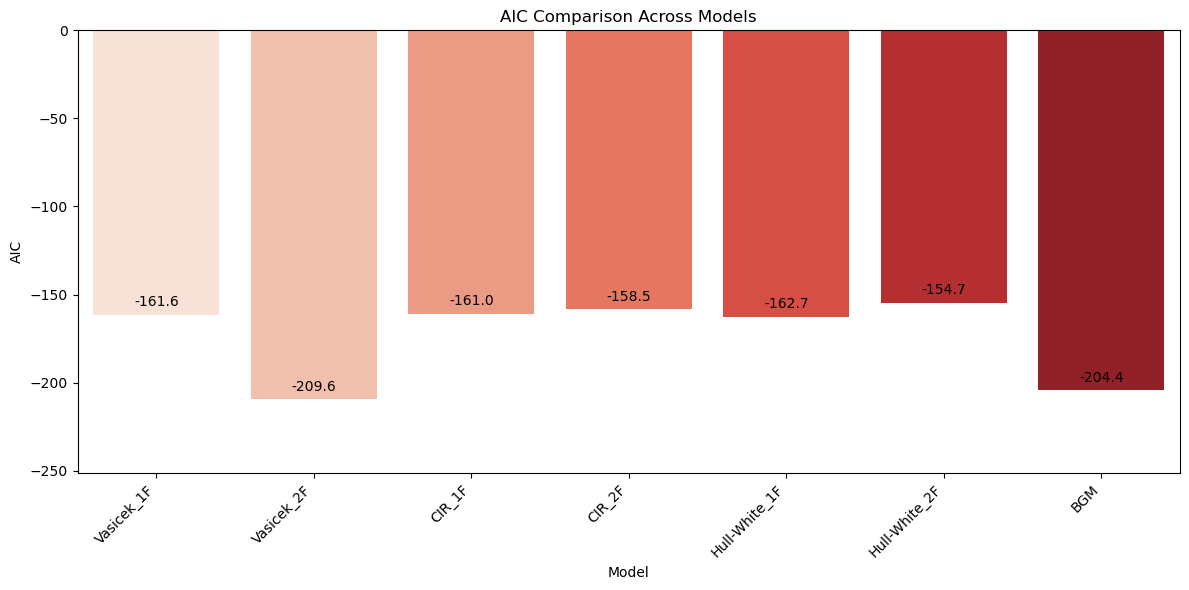

In [93]:
# Bar Plot for AIC
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AIC', hue='Model', data=df_metrics, palette='Reds', legend=False)
plt.title('AIC Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('AIC')
plt.xticks(rotation=45, ha='right')
plt.ylim(min(df_metrics['AIC']) * 1.2, 0)
for i, v in enumerate(df_metrics['AIC']):
    plt.text(i, v + 5, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.show()

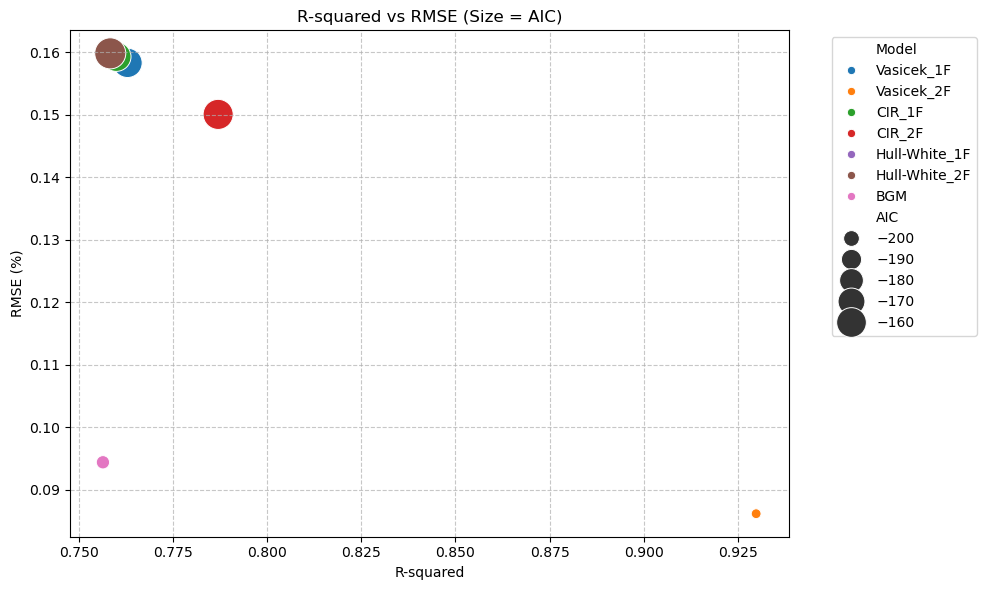

In [94]:
# Scatter Plot for RMSE vs R-squared
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R-squared', y='RMSE', hue='Model', size='AIC', sizes=(50, 500), data=df_metrics, legend='brief')
plt.title('R-squared vs RMSE (Size = AIC)')
plt.xlabel('R-squared')
plt.ylabel('RMSE (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [95]:
# Analysis
print("\nPerformance Analysis:")
best_r2_model = df_metrics['R-squared'].idxmax()
best_r2_value = df_metrics['R-squared'].max()
best_rmse_model = df_metrics['RMSE'].idxmin()
best_rmse_value = df_metrics['RMSE'].min()
best_aic_model = df_metrics['AIC'].idxmin()
best_aic_value = df_metrics['AIC'].min()

print(f"Best R-squared: {best_r2_model} ({best_r2_value:.3f})")
print(f"Lowest RMSE: {best_rmse_model} ({best_rmse_value:.3f})")
print(f"Lowest AIC: {best_aic_model} ({best_aic_value:.1f})")

print("\nSummary:")
print(" - R-squared: Measures explanatory power (higher is better).")
print(" - RMSE: Average error in yield predictions (lower is better).")
print(" - AIC: Balances fit and complexity (lower is better).")
print("\nObservations:")
for model in df_metrics.index:
    r2 = df_metrics.loc[model, 'R-squared']
    rmse = df_metrics.loc[model, 'RMSE']
    aic = df_metrics.loc[model, 'AIC']
    print(f" - {model}: R_squared={r2:.3f}, RMSE={rmse:.3f}, AIC={aic:.1f}")


Performance Analysis:
Best R-squared: Vasicek_2F (0.930)
Lowest RMSE: Vasicek_2F (0.086)
Lowest AIC: Vasicek_2F (-209.6)

Summary:
 - R-squared: Measures explanatory power (higher is better).
 - RMSE: Average error in yield predictions (lower is better).
 - AIC: Balances fit and complexity (lower is better).

Observations:
 - Vasicek_1F: R_squared=0.763, RMSE=0.158, AIC=-161.6
 - Vasicek_2F: R_squared=0.930, RMSE=0.086, AIC=-209.6
 - CIR_1F: R_squared=0.760, RMSE=0.159, AIC=-161.0
 - CIR_2F: R_squared=0.787, RMSE=0.150, AIC=-158.5
 - Hull-White_1F: R_squared=0.758, RMSE=0.160, AIC=-162.7
 - Hull-White_2F: R_squared=0.758, RMSE=0.160, AIC=-154.7
 - BGM: R_squared=0.756, RMSE=0.094, AIC=-204.4
